In [2]:
#Let s be one of two stimuli: s1 and s2
#let r be the firing rate response of a neuron to the stimulus

#Let r be represented by the Gaussian to s such that:
#under s1: mean = 5, sd = 0.5
#under s2: mean = 7, sd = 1

#assume both stimuli are equally likely and no prior info
#also include that we receive measurement of neuron's response and want to guess the stimulus,
#but that it is twice as bad to incorrectly guess s2 as it is to guess s1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#mean, standard deviation from s1 and s2
mu1,sigma1 = 5, 0.5
mu2,sigma2 = 7, 1.0

r1 = np.random.normal(mu1, sigma1, 2000)
r2 = np.random.normal(mu2, sigma2, 2000)

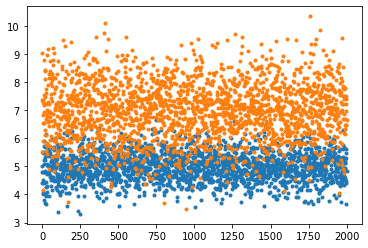

In [23]:
plt.plot(range(2000),r1,'.')
plt.plot(range(2000),r2,'.')

<BarContainer object of 200 artists>

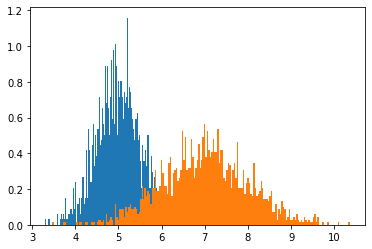

In [22]:
plt.hist(r1, 200, density=True)[2]
plt.hist(r2,200,density = True)[2]

In [86]:
#generate uniformly random list of s1 == 0, s2 == 1 numbers for the simulation
s_list = np.random.randint(2,size = 10000)
print(s_list[0:15])

[1 1 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [87]:
r_list = np.zeros(len(s_list))
for index,s in enumerate(s_list):
    if s == 0:
        #if stimulus was s1
        r_list[index] = np.random.normal(mu1, sigma1)
    else:
        #stim was s2
        r_list[index] = np.random.normal(mu2, sigma2)
    


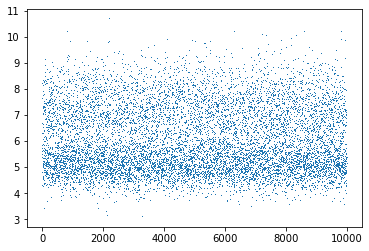

In [88]:
plt.plot(range(len(s_list)),r_list,',')

In [89]:
#now we will put different threshholds and measure how many instances the prediction was wrong
#while only considering it twice as bad to incorrectly guess s2 as it is to guess s1
#ie, count for 1 if incorrectly guess s1, count for 2 if incorrectly guess s2
def test_thresh(s_list,r_list,thresh_val):
    
    #incorrectly guess s1, incorrectly guess s2
    mist1,mist2 = 0,0
    
    
    #s_guess is predicted stimulus given threshold
    s_guess = -1
    for index, s in enumerate(s_list):
        if r_list[index] < thresh_val:
            s_guess = 0 #s_guess is s1
        else:
            s_guess = 1 #s_guess is s2
    
        if s_guess == 0 and s == 1:
            #incorectly guess s1
            mist1 += 1
        if s_guess == 1 and s == 0:
            #incorrectly guess s2
            mist2 += 2
    return [mist1,mist2]

In [90]:
thresh_list = [2.69, 5.83, 5.667, 5.978]

for thresh in thresh_list:
    mistake_vals = test_thresh(s_list, r_list, thresh)
    mistake_total = np.sum(mistake_vals)
    print(thresh, mistake_total)
    

2.69 10046
5.83 1123
5.667 1407
5.978 1053


In [95]:
thresh_list = np.linspace(4,7,500)

mistake_val = [np.sum(test_thresh(s_list,r_list,thresh)) for thresh in thresh_list]

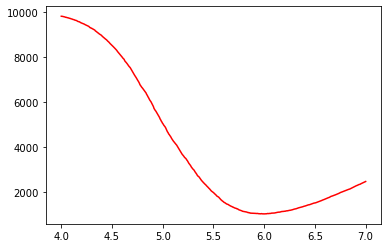

In [96]:
plt.plot(thresh_list,mistake_val,'-',color='r')

In [102]:
from scipy import optimize

In [112]:
given_test_thresh = lambda x: np.sum(test_thresh(s_list,r_list,x))
scipy.optimize.fminbound(given_test_thresh,5.5,6.5)

5.984120202160271

In [113]:
test_thresh(s_list,r_list,5.984120202160271)

[790, 256]